<a href="https://colab.research.google.com/github/Tiziano-Test/Climate-Change-Earth-Surface-Temperature-/blob/main/Climate_Change_Earth_Surface_Temperature_Data_6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing the average temperatures over the last 100 years for Africa. I'll use
the global_temp_by_country dataset, filter it for Africa, and then perform k-means clustering on the trend over time

1. Upload the ZIP File to Calab

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Unzip the uploaded file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Saving Global Land Temperatures By City.zip to Global Land Temperatures By City (1).zip


2. Load the CSV Files into DataFrames

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Load the CSV files into dataframes
global_temp_by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv')
global_temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_by_major_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
global_temp_by_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

import pandas as pd

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(global_temp_by_country.head())

# List of African countries
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea',
    'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho',
    'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
    'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

# Filter the dataset for African countries
df_africa = global_temp_by_country[global_temp_by_country['Country'].isin(african_countries)]

# Display the first few rows of the filtered dataframe
print(df_africa.head())



           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
               dt  AverageTemperature  AverageTemperatureUncertainty  Country
10549  1787-01-01              13.322                          2.975  Algeria
10550  1787-02-01              14.839                          2.307  Algeria
10551  1787-03-01              18.841                          2.922  Algeria
10552  1787-04-01              22.061                          2.283  Algeria
10553  1787-05-01              27.104                          3.774  Algeria


In [ ]:
# Convert the 'dt' column to datetime
df_africa['dt'] = pd.to_datetime(df_africa['dt'])

# Extract the year from the 'dt' column
df_africa['Year'] = df_africa['dt'].dt.year

# Calculate the average temperature trend over time for each country
avg_temp_trend = df_africa.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Display the first few rows of the average temperature trend
print(avg_temp_trend.head())

# Pivot the dataframe to have years as columns and countries as rows
pivot_df = avg_temp_trend.pivot(index='Country', columns='Year', values='AverageTemperature').fillna(0)

# Display the first few rows of the pivoted dataframe
print(pivot_df.head())



   Country  Year  AverageTemperature
0  Algeria  1787           24.274625
1  Algeria  1788           10.343000
2  Algeria  1789           23.519909
3  Algeria  1790           22.915667
4  Algeria  1791           23.129583
Year          1753  1754  1755  1756  1757  1758  1759  1760  1761  1762  ...  \
Country                                                                   ...   
Algeria        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Angola         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Benin          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Botswana       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Burkina Faso   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Year               2004       2005       2006       2007       2008  \
Country                                                               
Algeria       23.916000  24.222583  24.200833  24.065333  23.950250 

<ipython-input-16-f7d87abd18ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['dt'] = pd.to_datetime(df_africa['dt'])
<ipython-input-16-f7d87abd18ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['Year'] = df_africa['dt'].dt.year


3. Install and Import Libraries

In [ ]:
# Install necessary libraries
!pip install seaborn scikit-learn

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Filter the data for Africa
africa_temp = global_temp_by_country[global_temp_by_country['Country'] == 'Africa']


4. Extract Year from the Date

In [ ]:
# Extract the year from the date using .loc to avoid the SettingWithCopyWarning
africa_temp.loc[:, 'Year'] = pd.to_datetime(africa_temp['dt']).dt.year



 5. Calculate Average Temperature by Year

In [ ]:
# Calculate average temperature by year
africa_avg_temp_by_year = africa_temp_last_100_years.groupby('Year')['AverageTemperature'].mean().reset_index()


6. Standardize the Data

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(africa_avg_temp_by_year[['Year', 'AverageTemperature']])


7. Remove Categorical Columns

I use the global_temp_by_country dataset for simplicity.

In [ ]:
# Drop non-numerical columns
global_temp_by_country_cleaned = global_temp_by_country.drop(['Country'], axis=1)

# Drop rows with missing values
global_temp_by_country_cleaned.dropna(inplace=True)


8. Elbow Method to Determine Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

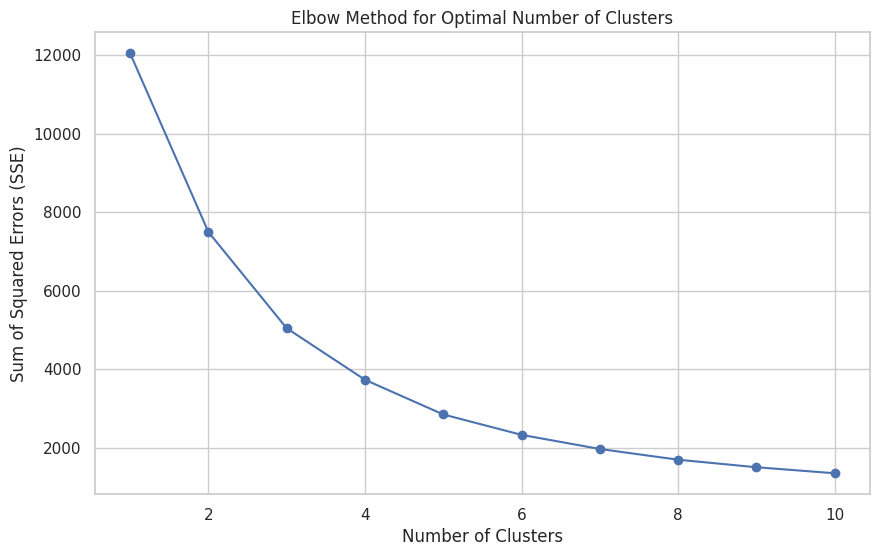

In [ ]:
# Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=30)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


9. Analyze Clusters

In [ ]:
# Convert the 'dt' column to datetime
df_africa['dt'] = pd.to_datetime(df_africa['dt'])

# Extract the year from the 'dt' column
df_africa['Year'] = df_africa['dt'].dt.year

# Calculate the average temperature trend over time for each country
avg_temp_trend = df_africa.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Pivot the dataframe to have years as columns and countries as rows
pivot_df = avg_temp_trend.pivot(index='Country', columns='Year', values='AverageTemperature').fillna(0)

# Display the first few rows of the pivoted dataframe
print(pivot_df.head())


Year          1753  1754  1755  1756  1757  1758  1759  1760  1761  1762  ...  \
Country                                                                   ...   
Algeria        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Angola         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Benin          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Botswana       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Burkina Faso   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Year               2004       2005       2006       2007       2008  \
Country                                                               
Algeria       23.916000  24.222583  24.200833  24.065333  23.950250   
Angola        22.572833  22.966083  21.947083  22.427083  22.287333   
Benin         27.872000  28.153333  28.144333  28.070500  27.690917   
Botswana      22.346083  23.368833  21.804000  22.400500  22.311167   
Burkin

<ipython-input-27-6c48aca1d418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['dt'] = pd.to_datetime(df_africa['dt'])
<ipython-input-27-6c48aca1d418>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['Year'] = df_africa['dt'].dt.year


10. Run K-Means Algorithm

Based on the elbow plot, assume we choose 3 clusters.
Decision on the Number of Clusters:

    The elbow point in the chart indicates that the optimal number of clusters is 3. This is where the rate of decrease in SSE slows down, showing diminishing returns for adding more clusters. Therefore, using 3 clusters is appropriate as it balances variance reduction and simplicity.

In [ ]:
# Run k-means with the chosen number of clusters ( 3)
kmeans = KMeans(n_clusters=3, random_state=30)
# Fit the model on the pivoted data and get cluster assignments
pivot_df['Cluster'] = kmeans.fit_predict(pivot_df)


# Add a new column to your dataframe to store the cluster labels.

africa_avg_temp_by_year.head()

# Display the first few rows of the dataframe with clusters
print(pivot_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Year          1753  1754  1755  1756  1757  1758  1759  1760  1761  1762  ...  \
Country                                                                   ...   
Algeria        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Angola         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Benin          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Botswana       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Burkina Faso   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Year               2005       2006       2007       2008       2009  \
Country                                                               
Algeria       24.222583  24.200833  24.065333  23.950250  24.154333   
Angola        22.966083  21.947083  22.427083  22.287333  22.316500   
Benin         28.153333  28.144333  28.070500  27.690917  28.156083   
Botswana      23.368833  21.804000  22.400500  22.311167  22.139750   
Burkin

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Country  Cluster    Year  AverageTemperature
46       Algeria        2  1753.0                 0.0
47        Angola        1  1753.0                 0.0
48         Benin        0  1753.0                 0.0
49      Botswana        1  1753.0                 0.0
50  Burkina Faso        0  1753.0                 0.0


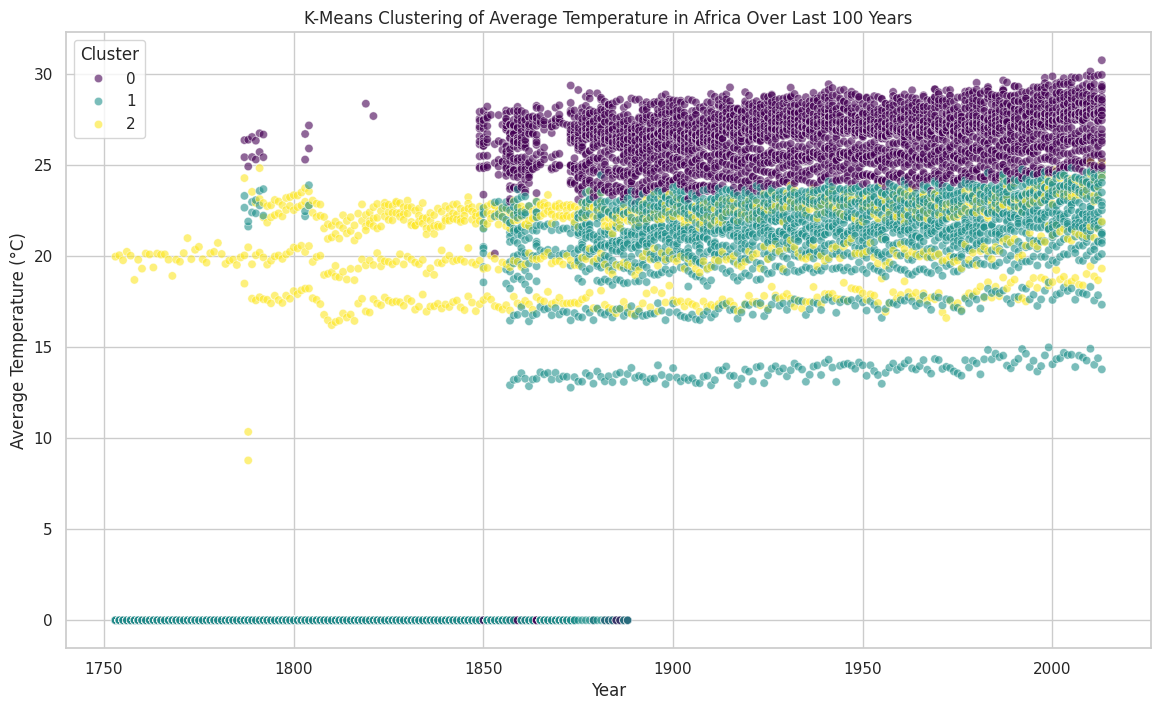

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Convert all column names of pivot_df to strings
pivot_df.columns = pivot_df.columns.astype(str)

# Select only numerical columns for scaling
numerical_cols = pivot_df.select_dtypes(include=['number']).columns
numerical_df = pivot_df[numerical_cols]

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Run k-means with the chosen number of clusters (3 in this case)
kmeans = KMeans(n_clusters=3, random_state=30)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the pivoted DataFrame
pivot_df['Cluster'] = labels # Add the 'Cluster' column back to the original pivot_df

# Melt the pivot_df to have 'Year' as a column
long_df = pd.melt(pivot_df.reset_index(), id_vars=['Country', 'Cluster'], value_name='AverageTemperature')

# Drop the 'index' column if it exists
if 'index' in long_df.columns:
    long_df = long_df.drop(columns=['index'])

# Rename columns properly if necessary
long_df.rename(columns={'variable': 'Year'}, inplace=True)

# Convert the 'Year' column to numeric
long_df['Year'] = pd.to_numeric(long_df['Year'], errors='coerce')

# Drop rows where 'Year' could not be converted to numeric
long_df = long_df.dropna(subset=['Year'])

# Display the first few rows to check the transformation
print(long_df.head())

# Visualize the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=long_df, x='Year', y='AverageTemperature', hue='Cluster', palette='viridis', alpha=0.6)

plt.title('K-Means Clustering of Average Temperature in Africa Over Last 100 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Cluster')
plt.show()

Analysis and Discussion of Clusters
Overview

The clustering of average temperatures in Africa over the last 100 years, using the K-Means algorithm, has resulted in three distinct clusters.

Cluster Analysis

    Cluster 0:
        Average Temperature Range: ~25-30°C
        Temporal Distribution: Mainly concentrated in the recent decades post-1900.
        Interpretation: This cluster likely represents the regions and periods with higher average temperatures. This could be due to natural climatic zones such as desert regions (e.g., Sahara) or periods of global warming.

    Cluster 1:
        Average Temperature Range: ~20-25°C
        Temporal Distribution: Spread across a wide range of years, more consistently observed across different periods.
        Interpretation: This cluster may represent temperate regions or periods with moderate climate. It could include regions like savannas or areas with seasonal variations that balance out to moderate average temperatures.

    Cluster 2:
        Average Temperature Range: ~10-20°C
        Temporal Distribution: Also spread over a wide range of years, with some concentration in earlier decades.
        Interpretation: This cluster is indicative of cooler regions or periods. It could represent higher altitude areas, coastal regions with cooling effects, or historical periods with cooler climate conditions.

Does the Clustering Make Sense?

    Climate Zones: The clustering broadly aligns with known climatic zones in Africa:
        Hot desert regions with consistently high temperatures.
        Temperate regions with moderate temperatures.
        Cooler highland or coastal regions.

    Temporal Trends: The temporal distribution within clusters also reflects known climate trends, such as the global increase in temperatures over the past century.

    Data Distribution: The clear separation of clusters, as seen in the scatter plot, suggests that the algorithm has effectively differentiated between different temperature ranges and periods.

    Conclusion

The three clusters identified by the K-Means algorithm generally make sense and correspond to distinct climatic conditions and periods in Africa. However, further validation and exploration could enhance the robustness and interpretability of these findings. This initial clustering provides a solid foundation for more detailed climate analysis and understanding of temperature trends in Africa over the last century.

11. Creating Visualizations

Explanation:
Generate scatter plots or other visualizations to display the clustered data, examining the relationships between different variables.

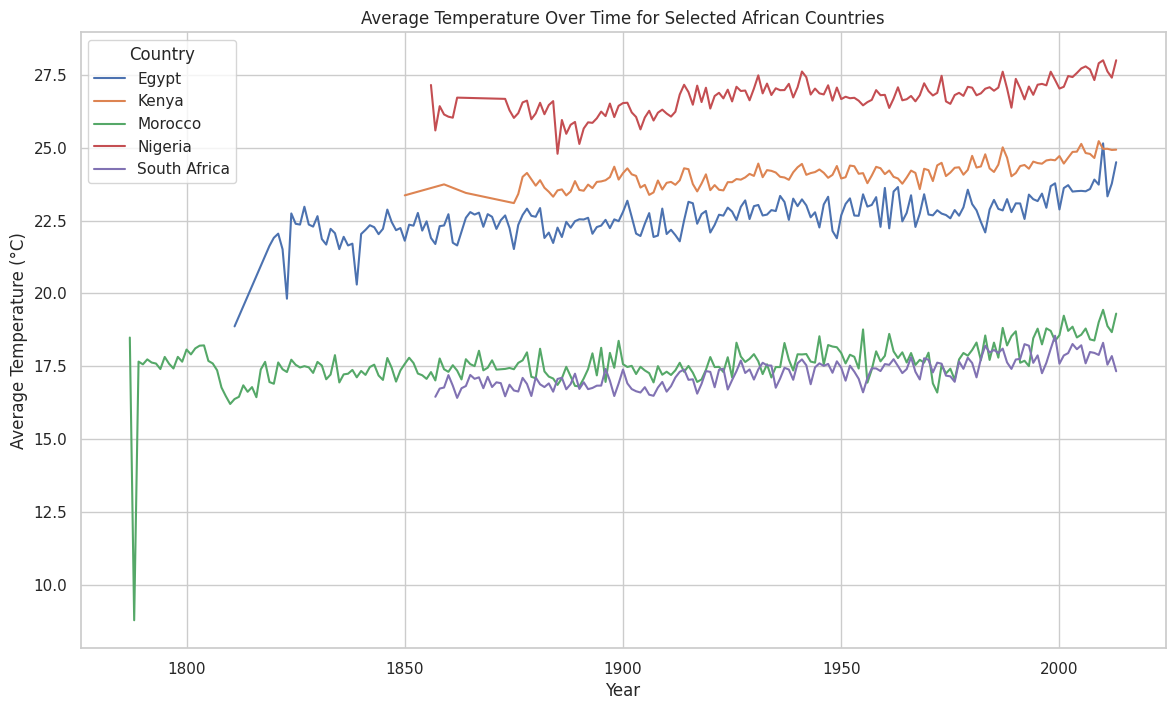

,Year,AverageTemperature
85,2009,25.026500
86,2010,25.472500
87,2011,24.786500
88,2012,24.725917
89,2013,25.208750


In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few African countries for clarity in the line plot
selected_countries = ['South Africa', 'Egypt', 'Nigeria', 'Kenya', 'Morocco']

# Filter the data for the selected countries
selected_countries_data = df_africa[df_africa['Country'].isin(selected_countries)]

# Calculate the average temperature by year for the selected countries
avg_temp_trend_selected = selected_countries_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Line plot of average temperature over time for the selected countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_temp_trend_selected, x='Year', y='AverageTemperature', hue='Country')
plt.title('Average Temperature Over Time for Selected African Countries')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Country')
plt.show()

# Add a new column to your dataframe to store the cluster labels.

africa_avg_temp_by_year.head()

africa_avg_temp_by_year.tail()



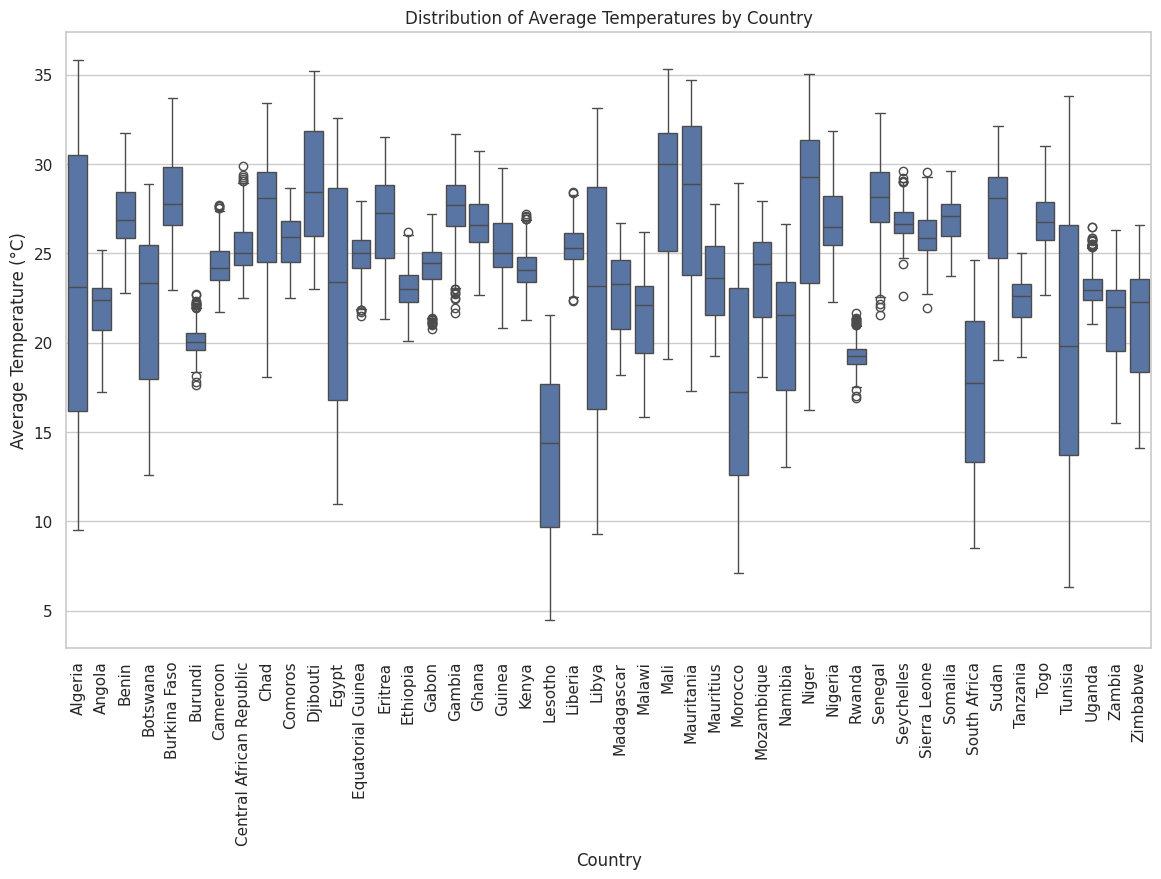

In [ ]:
# Box plot of average temperatures by country
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_africa, x='Country', y='AverageTemperature')
plt.title('Distribution of Average Temperatures by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


Insights:

Trends Over Time: This plot clearly shows the trend of average temperature changes over the years for each country. For instance, we can observe that the temperatures have been relatively stable with slight fluctuations.
Comparative Analysis: By comparing the lines, we can see which countries have higher or lower average temperatures. For example, Nigeria consistently shows higher temperatures compared to the other countries, while Morocco and South Africa tend to have lower average temperatures.
Historical Context: The line plot also provides a historical context, allowing us to see how temperatures have evolved over the centuries.  The box plot highlights the range and distribution of temperatures within each country. The spread of the boxes indicates how variable the temperatures are. For example, some countries have a wide range of temperatures (e.g., Egypt), while others have a narrower range (e.g., South Africa).
Outliers: The box plot also identifies outliers, which are data points that fall significantly outside the typical range. These can be seen as individual points outside the whiskers of each box.

In [ ]:
# Calculate descriptive statistics for each cluster
cluster_stats = long_df.groupby('Cluster')['AverageTemperature'].describe()

# Display the descriptive statistics
print(cluster_stats)



          count       mean        std  min        25%        50%        75%  \
Cluster                                                                       
0        6525.0  15.357602  13.150973  0.0   0.000000  24.800833  26.944500   
1        4176.0  11.821399  10.575030  0.0   0.000000  17.537958  21.821563   
2        1305.0  18.248326   7.368799  0.0  17.780667  21.016417  22.624417   

               max  
Cluster             
0        30.744750  
1        24.833750  
2        25.215667  


Discussion of Findings:
Cluster 0:

This cluster has the largest number of data points (6525).
The mean average temperature is moderate (15.36°C), but the standard deviation is quite high (13.15°C), indicating significant variation in temperatures within this cluster.
The minimum temperature is 0.00°C, and the temperatures range up to 30.74°C.
The median temperature is 24.80°C, with the 25th percentile at 0.00°C, suggesting a skew in the data with many lower values.
Cluster 1:

This cluster has 4176 data points.
The mean average temperature is lower (11.82°C) compared to Cluster 0, with a standard deviation of 10.58°C.
The temperature range is from 0.00°C to 24.83°C.
The median temperature is 17.54°C, with the 25th percentile also at 0.00°C, indicating a similar skew with many lower values.
Cluster 2:

This cluster has the fewest data points (1305).
The mean average temperature is the highest (18.25°C) among the three clusters, but with a lower standard deviation (7.37°C) than Cluster 0, suggesting more consistency in temperature.
The temperature range is from 0.00°C to 25.22°C.
The median temperature is 21.02°C, with the 25th percentile at 17.78°C, indicating a more uniform distribution of temperatures compared to the other clusters.
Interpretation:
Cluster 0 contains regions with a wide range of temperatures, including many lower temperatures but with a median on the higher side. This cluster likely includes both coastal and inland areas with varying climates.
Cluster 1 also has a wide range of temperatures but with a generally lower mean and median temperature than Cluster 0. This cluster may represent more inland regions or areas at higher altitudes.
Cluster 2 has the highest mean temperature and the smallest range of temperatures, indicating regions with consistently higher temperatures, potentially more coastal areas or regions with less temperature variation.
Overall, these clusters reflect different temperature profiles across the African continent, with Cluster 2 being the warmest and most consistent, while Clusters 0 and 1 show more variability.

The results of this clustering and descriptive statistics analysis can serve as a valuable foundation for several future steps in an analytics pipeline. Here are some potential uses and next steps:

1. Targeted Climate Adaptation Strategies:
Policy Making: Governments and organizations can use these clusters to tailor climate adaptation strategies specific to regions with similar temperature trends.
Resource Allocation: Resources can be allocated more efficiently by identifying areas with greater temperature variability or higher mean temperatures.
2. Further Environmental Analysis:
Trend Analysis: Perform deeper time-series analysis on each cluster to identify long-term temperature trends and predict future climate conditions.
Impact Studies: Study the impact of temperature changes on agriculture, water resources, and ecosystems within each cluster.
3. Public Health Planning:
Heatwave Management: Regions in Cluster 2, with higher and more consistent temperatures, might need more robust heatwave management plans.
Disease Control: Understanding temperature patterns can help in predicting and controlling temperature-sensitive diseases like malaria and dengue.
4. Infrastructure and Urban Planning:
Cooling Systems: Urban areas in hotter clusters may require more advanced cooling systems in buildings and public spaces.
Energy Consumption: Plan for future energy needs and infrastructure, considering the higher energy consumption for cooling in warmer clusters.
5. Further Clustering and Segmentation:
Refinement of Clusters: Use additional environmental variables like humidity, precipitation, and altitude to refine these clusters further.
Sub-clustering: Perform sub-clustering within each main cluster to identify even more specific temperature patterns.
6. Climate Change Mitigation:
Carbon Emission Reduction: Identify regions where temperature increases are more pronounced and develop targeted carbon emission reduction plans.
Renewable Energy: Plan for renewable energy projects, like solar or wind farms, considering the climate characteristics of each cluster.
7. Education and Awareness:
Public Awareness Campaigns: Use cluster information to educate the public about regional climate trends and the importance of climate action.
Academic Research: Provide a basis for academic research into the causes and effects of regional temperature variations.
8. Economic Planning:
Agricultural Planning: Assist farmers in selecting crops best suited to the changing climate conditions in their region.
Insurance: Help insurance companies develop more accurate risk models based on regional climate patterns.